**Table of contents**<a id='toc0_'></a>

- [Data Mining Lab 2 - Phase 1](#toc1_)
  - [Summarized Table of Contents](#toc1_1_)
  - [Before Starting](#toc1_2_)
  - [Introduction](#toc1_3_)
  - [**1. Data Preparation**](#toc1_4_)
  - [**1.1 Load data**](#toc1_5_)  
     - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)
    - [**1.2 Save data**](#toc1_5_2_)
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)
  - [**2. Feature engineering**](#toc1_6_)
    - [Using Bag of Words](#toc1_6_1_)
      - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)
  - [**3. Model**](#toc1_7_)
    - [**3.1 Decision Trees**](#toc1_7_1_)
  - [**4. Results Evaluation**](#toc1_8_)  
     - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)  
     - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)  
     - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)
  - [**5. Other things you can try**](#toc1_9_)
  - [**6. Deep Learning**](#toc1_10_)
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)
    - [**6.3 Build model**](#toc1_10_3_)
    - [**6.4 Train**](#toc1_10_4_)
    - [**6.5 Predict on testing data**](#toc1_10_5_)
      - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)
    - [Note](#toc1_10_6_)
    - [More Information for your reference](#toc1_10_7_)
  - [**7. Word2Vector**](#toc1_11_)
    - [**7.1 Prepare training corpus**](#toc1_11_1_)
    - [**7.2 Training our model**](#toc1_11_2_)
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)
      - [(1) Download model by yourself](#toc1_11_4_1_)
      - [(2) Using gensim api](#toc1_11_4_2_)
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)
      - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)
  - [**8. Clustering: k-means**](#toc1_12_)
    - [Basic concept](#toc1_12_1_1_)
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)
      - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

In [4]:
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [7]:
# Answer here
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

train_cv = CountVectorizer()
train_word_counts = train_cv.fit_transform(train_df.text)
train_tf = np.asarray(train_word_counts.sum(axis=0))[0]

In [8]:
import plotly.express as px

def plot_top_n_word_freq(word_freq_dict, top_n=30):
    top_n_words = sorted(
        train_cv.get_feature_names_out(),
        key=lambda x: word_freq_dict[train_cv.vocabulary_[x]],
        reverse=True
    )[:top_n]
    top_n_freqs = train_tf[train_cv.transform(top_n_words).indices]
    
    fig = px.bar(x=top_n_words, y=top_n_freqs, labels={'x':'Words', 'y':'Frequencies'},
                 title=f'Top {top_n} Most Frequent Words in Training Set')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

plot_top_n_word_freq(train_tf, top_n=30)

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [9]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [10]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [11]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

Text(0, 0.5, '% of instances')

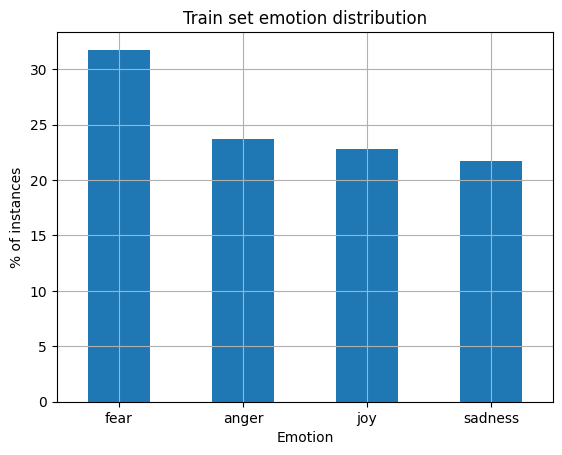

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

(train_df.emotion.value_counts() / train_df.shape[0] * 100).plot(
    kind='bar', 
    title='Train set emotion distribution', 
    color='C0',
    rot=0
)
plt.grid(True)
plt.xlabel('Emotion')
plt.ylabel('% of instances')

<Axes: title={'center': 'Test set intensity distribution'}, ylabel='Frequency'>

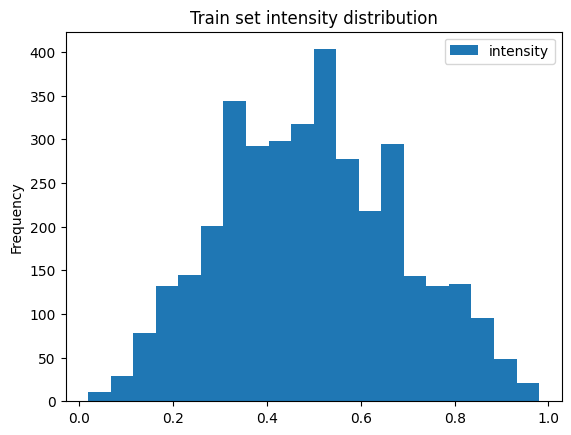

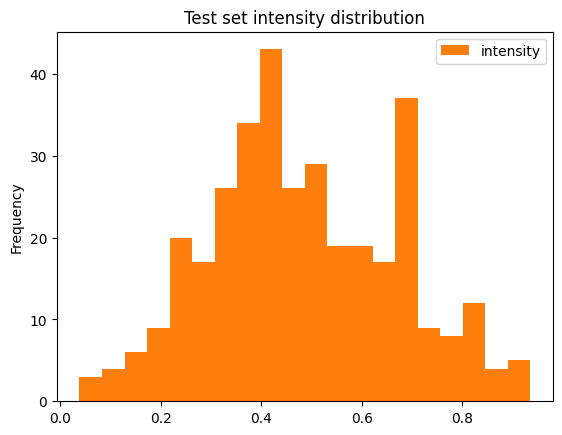

In [13]:
train_df.plot(kind='hist', y='intensity', bins=20, title='Train set intensity distribution', color='C0', sharex=True)
test_df.plot(kind='hist', y='intensity', bins=20, title='Test set intensity distribution', color='C1', sharex=True)

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [16]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [17]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [18]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [19]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [21]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yield better performance than counterparts)

In [22]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [23]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(
    max_features=500, tokenizer=nltk.word_tokenize, token_pattern=None)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

# check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [24]:
train_data_BOW_features_500.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 3, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [25]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [26]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of the BOW one with 1000 features and show the feature names for features [100:110].

In [27]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# build analyzer (TF-IDF)
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize, token_pattern=None)

# apply analyzer to training data
TFIDF_1000.fit(train_df['text'])

train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

## check dimension
train_data_TFIDF_features_1000.shape

(3613, 1000)

In [28]:
TFIDF_1000.get_feature_names_out()[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [30]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'joy', 'fear', 'anger', 'fear', 'sadness', 'joy', 'joy',
       'fear', 'sadness'], dtype=object)

In [31]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, "Correct": y_test == y_test_pred}).head(10)

,Actual,Predicted,Correct
114,fear,fear,True
216,joy,joy,True
234,joy,fear,False
73,anger,anger,True
88,fear,fear,True
293,sadness,sadness,True
233,joy,joy,True
211,joy,joy,True
59,anger,fear,False
304,sadness,sadness,True


---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [32]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print(f'training accuracy: {acc_train:.2f}')
print(f'testing accuracy: {acc_test:.2f}')


training accuracy: 0.99
testing accuracy: 0.68


In [33]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [34]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


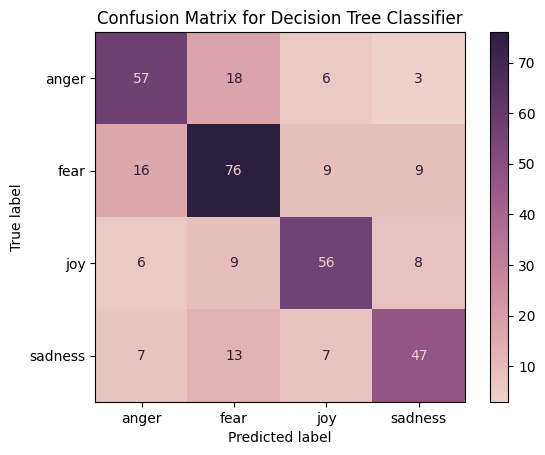

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=DT_model.classes_)
disp.plot(cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

**Answer here**

While there are some misclassifications here and there, three pairs of predicted vs actual labels stand out with high counts: **anger-fear**, **fear-anger**, and **fear-sadness**.

For **anger-fear** and **fear-anger**, it is understandable that these two emotions can be similar in certain contexts, leading to confusion between them. For example, a sentence expressing frustration might be interpreted as either anger or fear depending on the nuances of the language used.

For **fear-sadness**, the confusion might arise from the fact that posts expressing sadness can sometimes be tinged with fear, especially if the sadness is related to uncertainty about the future or loss. In contrast, the inverse confusion of sadness being misclassified as fear seems to be less intuitive.


---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [36]:
# Answer here
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB,  ComplementNB

for NB_model in (MultinomialNB(), GaussianNB(), BernoulliNB(), ComplementNB()):
    NB_model.fit(X_train.toarray(), y_train)
    y_train_pred_nb = NB_model.predict(X_train.toarray())
    y_test_pred_nb = NB_model.predict(X_test.toarray())
    print("\nModel:", NB_model.__class__.__name__)
    print(f"Train accuracy: {accuracy_score(y_train, y_train_pred_nb):.2f}")
    print(f"Test accuracy: {accuracy_score(y_test, y_test_pred_nb):.2f}")
    print("\nClassification Report:\n", classification_report(y_test, y_test_pred_nb))


Model: MultinomialNB
Train accuracy: 0.79
Test accuracy: 0.70

Classification Report:
               precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347


Model: GaussianNB
Train accuracy: 0.76
Test accuracy: 0.65

Classification Report:
               precision    recall  f1-score   support

       anger       0.53      0.73      0.61        84
        fear       0.79      0.59      0.68       110
         joy       0.65      0.81      0.72        79
     sadness       0.69      0.47      0.56        74

    accuracy                           0.65       347
   macro avg       0.66      0.65      0.64       347
weighted avg

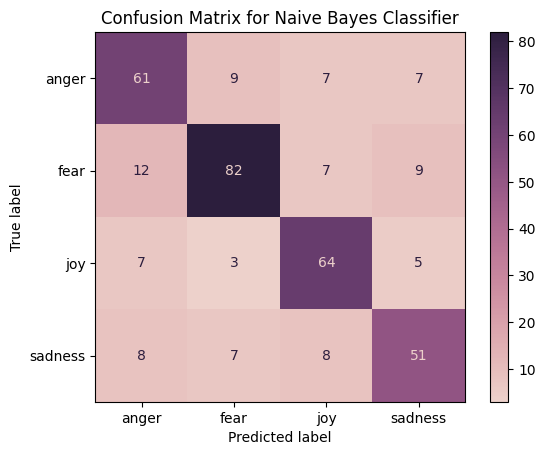

In [37]:
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred_nb) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=NB_model.classes_)
disp.plot(cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

**Answer here**

The decision tree model achieved a training accuracy of 0.99 and a testing accuracy of 0.68, indicating a possible overfitting to the training data.

In contrast, the different Naive Bayes models all achieved a training accuracy of ~0.8 and a testing accuracy of ~0.75. While the training accuracy is lower than that of the decision tree, the testing accuracy is higher, suggesting better generalization to unseen data.

The overall low testing accuracies of both models indicate that our feature engineering approach (Bag of Words) may not be capturing the necessary information to effectively classify the emotions in the text data. Further improvements in feature extraction or model complexity may be needed to enhance performance.

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

In [38]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Train Word2Vec model
tokenized_texts = train_df['text'].apply(word_tokenize).tolist()
W2V_1000 = Word2Vec(sentences=tokenized_texts, vector_size=1000, window=5, min_count=1, workers=4)
W2V_3000 = Word2Vec(sentences=tokenized_texts, vector_size=3000, window=5, min_count=1, workers=4)

In [39]:
def vectorize_w2v(texts, model):
    vectors = []
    for text in texts:
        tokens = word_tokenize(text)
        word_vectors = [model.wv[word]
                        for word in tokens if word in model.wv]
        if word_vectors:
            vectors.append(np.sum(word_vectors, axis=0))  # BoW average
        else:
            vectors.append(np.zeros(model.vector_size))
    return np.array(vectors)

vectorize_w2v(train_df['text'], W2V_1000).shape

(3613, 1000)

In [40]:
from gensim.models import KeyedVectors
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context


model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
GGNV = KeyedVectors.load_word2vec_format(model_path, binary=True)
GLOVE_25 = api.load("glove-twitter-25")

In [41]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def vectorize_kv(texts, model):
    vectors = []
    stop = set(stopwords.words('english'))
    for text in texts:
        tokens = word_tokenize(text)
        word_vectors = [model[word]
                        for word in tokens if word in model and word not in stop]
        if word_vectors:
            vectors.append(np.sum(word_vectors, axis=0))  # BoW average
        else:
            vectors.append(np.zeros(model.vector_size))
    return np.array(vectors)

vectorize_kv(train_df['text'], GLOVE_25).shape

[nltk_data] Downloading package stopwords to /home/dogeon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(3613, 25)

In [42]:
vectorizers = {
    'BOW': CountVectorizer(),
    'BOW_500': CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize, token_pattern=None),
    'TFIDF_1000': TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize, token_pattern=None),
    'W2V_1000': W2V_1000,
    'W2V_3000': W2V_3000,
    'GGNV': GGNV,
    'GLOVE_25': GLOVE_25
}
vecs = {}

for vec_name, vectorizer in vectorizers.items():
    if vec_name == 'W2V_1000' or vec_name == 'W2V_3000':
        X_train_vec = vectorize_w2v(train_df['text'], vectorizer)
        X_test_vec = vectorize_w2v(test_df['text'], vectorizer)
    elif vec_name == 'GGNV' or vec_name == 'GLOVE_25':
        X_train_vec = vectorize_kv(train_df['text'], vectorizer)
        X_test_vec = vectorize_kv(test_df['text'], vectorizer)
    else:
        X_train_vec = vectorizer.fit_transform(train_df['text']).toarray()
        X_test_vec = vectorizer.transform(test_df['text']).toarray()
    vecs[vec_name] = (X_train_vec, X_test_vec)

In [43]:
from itertools import product
from tqdm import tqdm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB
from sklearn.ensemble import RandomForestClassifier

models = {
    'DecisionTree': DecisionTreeClassifier(random_state=1),
    'RandomForest': RandomForestClassifier(random_state=1),
    'MultinomialNB': Pipeline([
        ('scaler', MinMaxScaler()),
        ('nb', MultinomialNB())
    ]),
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'ComplementNB': Pipeline([
        ('scaler', MinMaxScaler()),
        ('nb', ComplementNB())
    ])
}
results_df = pd.DataFrame(
    columns=['Vectorizer', 'Model', 'Train Accuracy', 'Test Accuracy'])

for (vec_name, vec), (model_name, model) in tqdm(product(vecs.items(), models.items()), total=len(vectorizers)*len(models)):
    X_train_vec, X_test_vec = vec
    y_train = train_df['emotion']
    y_test = test_df['emotion']
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    results_df.loc[len(results_df)] = [
        vec_name,
        model_name,
        accuracy_score(y_train, model.predict(X_train_vec)),
        accuracy_score(y_test, y_pred)
    ]

results_df.sort_values(by='Test Accuracy', ascending=False, inplace=True)

100%|██████████| 42/42 [01:00<00:00,  1.44s/it]


In [44]:
results_df

,Vectorizer,Model,Train Accuracy,Test Accuracy
1,BOW,RandomForest,0.986715,0.815562
0,BOW,DecisionTree,0.986715,0.804035
17,TFIDF_1000,ComplementNB,0.882923,0.792507
13,TFIDF_1000,RandomForest,0.986715,0.789625
5,BOW,ComplementNB,0.977858,0.778098
16,TFIDF_1000,BernoulliNB,0.883753,0.766571
2,BOW,MultinomialNB,0.975090,0.731988
7,BOW_500,RandomForest,0.985884,0.723343
11,BOW_500,ComplementNB,0.795461,0.723343
14,TFIDF_1000,MultinomialNB,0.865486,0.720461


In [45]:
results_df.groupby('Vectorizer')['Test Accuracy'].mean().sort_values(ascending=False)

Vectorizer
TFIDF_1000    0.730067
BOW           0.718540
BOW_500       0.696926
GGNV          0.450528
GLOVE_25      0.354467
W2V_1000      0.286263
W2V_3000      0.282901
Name: Test Accuracy, dtype: float64

In [46]:
results_df.groupby('Model')['Test Accuracy'].mean().sort_values(ascending=False)

Model
RandomForest     0.538905
ComplementNB     0.531906
BernoulliNB      0.516262
MultinomialNB    0.498971
DecisionTree     0.473858
GaussianNB       0.456978
Name: Test Accuracy, dtype: float64

Overall, decision trees are prone to overfitting, especially with low-dimensional data with pruned features. Even though BOW + decision tree ranked at 2nd place, this success should be contributed to the rich, unpruned feature set provided by the Bag of Words approach (according to the overall well-performing nature of BOW in the experiments).

Word2Vec embeddings tend to perform worse than simpler Bag of Words embeddings with these models. This suggests that our approach to averaging word vectors to create document-level embeddings may not be effectively capturing the semantic nuances necessary for accurate emotion classification. Normal BoW approaches, despite their simplicity, may retain more of the discriminative information needed for this specific classification task.


---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [47]:
# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [48]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [49]:
import keras
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2025-10-20 23:56:45.201275: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-20 23:56:45.201482: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-20 23:56:45.222580: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI AVX_VNNI_INT8 AVX_NE_CONVERT FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-20 23:56:45.970759: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computat

[]


E0000 00:00:1761004606.159348  534904 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1761004606.178092  534904 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [50]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1331     fear
1508     fear
1703     fear
299     anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [51]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [52]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [53]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [54]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3814 - loss: 1.3177 - val_accuracy: 0.4669 - val_loss: 1.2553
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6335 - loss: 0.9893 - val_accuracy: 0.6513 - val_loss: 0.9368
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7888 - loss: 0.5946 - val_accuracy: 0.6974 - val_loss: 0.7728
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8478 - loss: 0.4204 - val_accuracy: 0.7089 - val_loss: 0.8080
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8815 - loss: 0.3313 - val_accuracy: 0.7118 - val_loss: 0.8235
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9106 - loss: 0.2662 - val_accuracy: 0.6772 - val_loss: 0.8559
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9255 - loss: 0.2216 - val_accuracy: 0.6772 - val_loss: 0.9557
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9435 - loss: 0.1778 - val_accuracy: 0.

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [55]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[6.6574086e-07, 9.9718213e-01, 3.6379470e-07, 2.8168005e-03],
       [6.0966969e-09, 1.2443572e-08, 9.9992287e-01, 7.7133089e-05],
       [2.7300229e-02, 9.6725978e-02, 1.6362296e-03, 8.7433767e-01],
       [9.9975985e-01, 2.7759941e-05, 1.4461268e-04, 6.7782930e-05],
       [9.0330821e-01, 2.0712545e-02, 5.2646659e-03, 7.0714533e-02]],
      dtype=float32)

In [56]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'joy', 'sadness', 'anger', 'anger'], dtype=object)

In [57]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [58]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.381400,1.317669,0.466859,1.255324
1,1,0.633546,0.989287,0.651297,0.936845
2,2,0.788818,0.594617,0.697406,0.772835
3,3,0.847772,0.420353,0.708934,0.807983
4,4,0.881539,0.331314,0.711816,0.823462
5,5,0.910601,0.266190,0.677233,0.855914
6,6,0.925547,0.221611,0.677233,0.955674
7,7,0.943537,0.177841,0.688761,1.001339
8,8,0.951287,0.155125,0.668588,1.069309
9,9,0.957653,0.137154,0.680115,1.115250


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


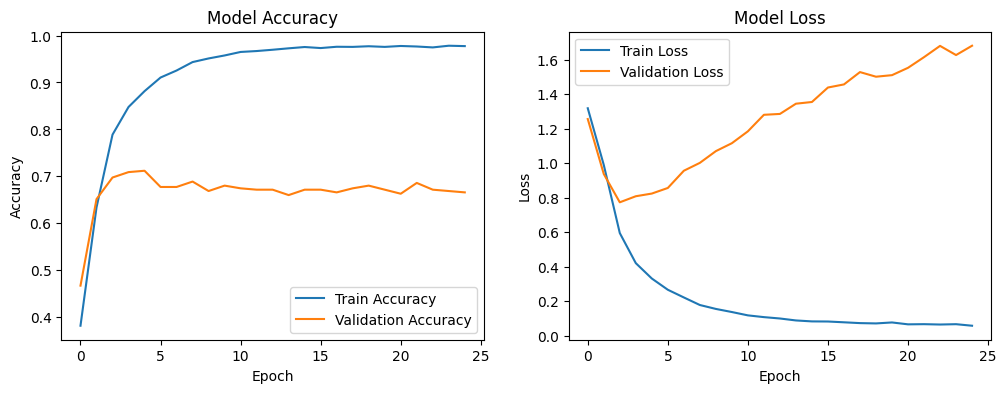

In [59]:
# Answer here
def plot_training_log(training_log):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    ax[0].plot(training_log['accuracy'], label='Train Accuracy')
    ax[0].plot(training_log['val_accuracy'], label='Validation Accuracy')
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    ax[1].plot(training_log['loss'], label='Train Loss')
    ax[1].plot(training_log['val_loss'], label='Validation Loss')
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].legend()
    plt.show()

plot_training_log(training_log)

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [60]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1331,20474,You don't know what to expect by Brendon's vid...,"[You, do, n't, know, what, to, expect, by, Bre..."
1508,20651,@OC_Transpo some weeks there are no problems b...,"[@, OC_Transpo, some, weeks, there, are, no, p..."
1703,20846,"thank you for your concern, computer, but my l...","[thank, you, for, your, concern, ,, computer, ..."
299,10299,@johnaugust @clmazin I was so looking forward ...,"[@, johnaugust, @, clmazin, I, was, so, lookin..."
1987,21130,"I polished my nails, but can't find the polish...","[I, polished, my, nails, ,, but, ca, n't, find..."


In [61]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['You', 'do', "n't", 'know', 'what', 'to', 'expect', 'by', 'Brendon', "'s", 'video', 'lmao', 'LA', 'devotee', 'video', 'got', 'me', 'shook', '#', 'panic']),
       list(['@', 'OC_Transpo', 'some', 'weeks', 'there', 'are', 'no', 'problems', 'but', 'this', 'week', 'is', 'unbelievable', '--', 'are', 'you', 'guys', 'even', 'running', 'regular', '12', 'buses', '?', '#', 'awful', '#', 'solate']),
       list(['thank', 'you', 'for', 'your', 'concern', ',', 'computer', ',', 'but', 'my', 'last', 'name', 'is', "n't", 'misspelled', ',', 'it', "'s", 'just', 'weird'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [62]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [63]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.61392957,  0.11037883,  0.1521866 ,  0.02518705, -0.643972  ,
       -0.7064042 ,  0.85259587,  1.1294218 , -0.3068882 , -0.7286716 ,
       -0.72233737, -0.4504231 , -0.27837995,  0.30666727, -0.37859505,
       -0.62194604,  0.4741828 , -0.51869446,  0.06690358, -0.99311924,
        0.797281  ,  0.7378347 ,  0.19895506,  0.01609489,  0.23837972,
        0.10647491, -1.0018666 ,  0.1155519 , -0.28025928,  0.03587439,
        0.07361399, -0.01973387,  0.31905195, -0.62176424, -0.21735418,
        0.6214967 ,  0.23000044, -0.13385676, -0.6013937 , -0.41051516,
        0.11634556, -0.3242645 , -0.47691914,  0.32780543,  0.4974067 ,
       -0.4563203 , -1.1711317 ,  0.51468945,  0.21122047,  0.2794097 ,
        0.3901558 , -0.6475805 , -0.19483455,  0.05774161, -0.7826845 ,
       -0.09328126,  0.24611889, -0.32073468,  0.08455914,  0.15310733,
        0.05108234, -0.07096812,  0.90727305,  0.25038356, -0.45041665,
        0.68507516,  0.19370696,  0.6181497 , -1.5925517 ,  0.38

In [64]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('help', 0.9116104245185852),
 ('Really', 0.9037311673164368),
 ('November', 0.9036028981208801),
 ("'you", 0.9013108015060425),
 ('bday', 0.9010441899299622),
 ('birthday', 0.900208592414856),
 ('smile', 0.8992114067077637),
 ('cats', 0.8951942920684814),
 ('spots', 0.8912611603736877),
 ('blessing', 0.888882040977478)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [65]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626911163330078),
 ('overjoyed', 0.6599287390708923),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [66]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817320823669),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150083661079407),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [67]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118191123008728),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902430415153503),
 ('crown_prince', 0.5499458909034729),
 ('prince', 0.5377322435379028),
 ('kings', 0.5236843824386597),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134939193726),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


**Answer here**

The most straightforward approach is to average/sum the word vectors of all words in the sentence to create a single vector representation for the entire sentence. This method, often referred to as the Bag of Words (BoW) average, captures the overall semantic content of the sentence by combining the individual word embeddings. Such implementation can be found [above](#toc1_9_) (stop words are removed in the implementation).

However, this approach ignores word order and syntactic structure, which can be important for understanding the meaning of a sentence. More sophisticated methods would involve using models like RNNs, LSTMs, or Transformers that can capture the sequential nature of the text.


---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [ ]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [ ]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](./pics/pic6.png)

In [ ]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [ ]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [ ]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

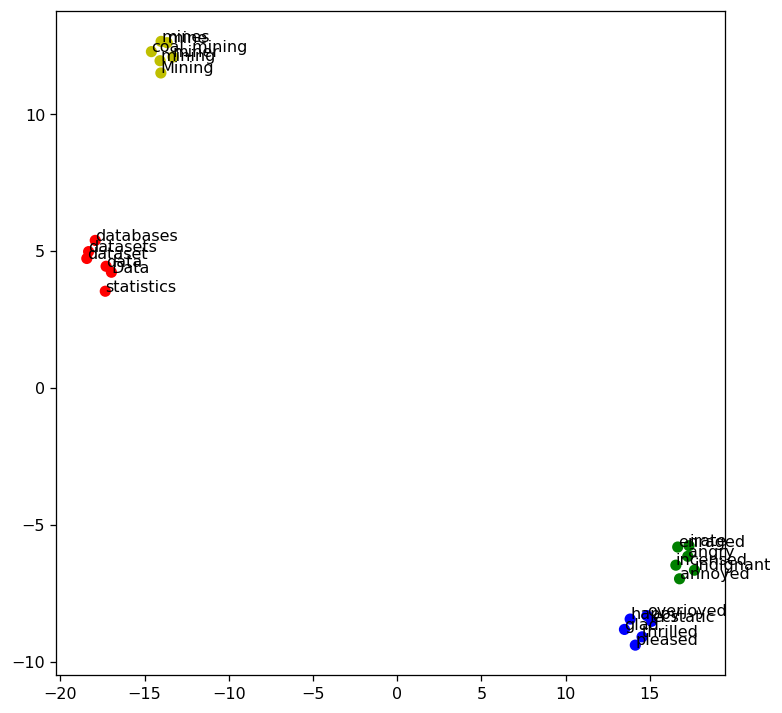

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

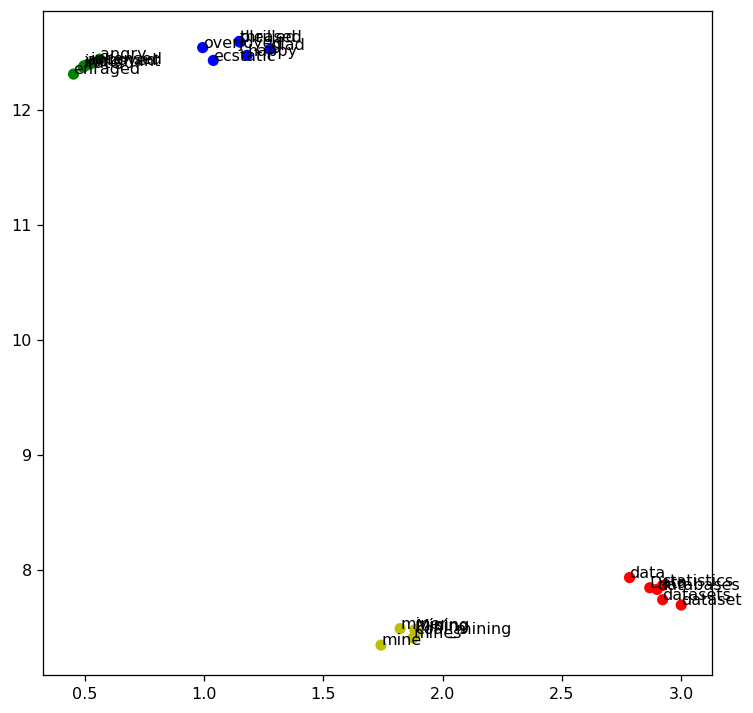

In [ ]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [ ]:
# Answer here


---

## 10. Improvements

- More concise plotting (label distribution, confusion matrix)